#### Copyright © 2021 United States Government as represented by the Administrator of the National Aeronautics and Space Administration.  All Rights Reserved.

##### Example demonstrating approaches for adding and handling model noise

In [ ]:
import matplotlib.pyplot as plt
from prog_models.models.thrown_object import ThrownObject

#### Defining ThrownObject

In [10]:
m = ThrownObject(process_noise=False)

### Define future loading, configuration for simulation, and a function to print the results

In [11]:
def future_load(t=None, x=None):  
    # The thrown object model has no inputs- you cannot load the system (i.e., affect it once it's in the air)
    # So we return an empty input container
    return m.InputContainer({})


# Define configuration for simulation
config = {
    'threshold_keys': 'impact', # Simulate until the thrown object has impacted the ground
    'dt': 0.005, # Time step (s)
    'save_freq': 0.5, # Frequency at which results are saved (s)
}

# Define a function to print the results - will be used later
def print_results(simulated_results):
    # Print results
    print('states:')
    for (t,x) in zip(simulated_results.times, simulated_results.states):
        print('\t{:.2f}s: {}'.format(t, x))

    print('outputs:')
    for (t,x) in zip(simulated_results.times, simulated_results.outputs):
        print('\t{:.2f}s: {}'.format(t, x))

    print('\nimpact time: {:.2f}s'.format(simulated_results.times[-1]))
    # The simulation stopped at impact, so the last element of times is the impact time

    # Plot results
    simulated_results.states.plot()

### Ex1: No noise

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.35092591060207, 'v': 34.07855124289541}
	1.00s: {'x': 36.12822744263126, 'v': 28.393737692901528}
	1.50s: {'x': 48.9812214219364, 'v': 22.99846684410669}
	2.00s: {'x': 59.18332628263409, 'v': 17.784029484245163}
	2.50s: {'x': 66.81357749367159, 'v': 12.705288070826589}
	3.00s: {'x': 71.92955924357045, 'v': 7.721366562656726}
	3.50s: {'x': 74.56918342157253, 'v': 2.794268972436784}
	4.00s: {'x': 74.75187498447991, 'v': -2.1113986020335997}
	4.50s: {'x': 72.51970359869338, 'v': -6.951038077083324}
	5.00s: {'x': 67.84376796132159, 'v': -11.78994457815374}
	5.50s: {'x': 60.767651534582804, 'v': -16.545494944171786}
	6.00s: {'x': 51.34088892233225, 'v': -21.18640641142484}
	6.50s: {'x': 39.62791879000095, 'v': -25.684491985662305}
	7.00s: {'x': 25.706379318441126, 'v': -30.015262094408577}
	7.50s: {'x': 9.665150243939953, 'v': -34.158332454780265}
	7.78s: {'x': -0.02584293949765626, 'v': -36.35101411864478}
outputs:
	0.00s: {'x': 1.83}

Text(0.5, 1.0, 'Ex1: No noise')

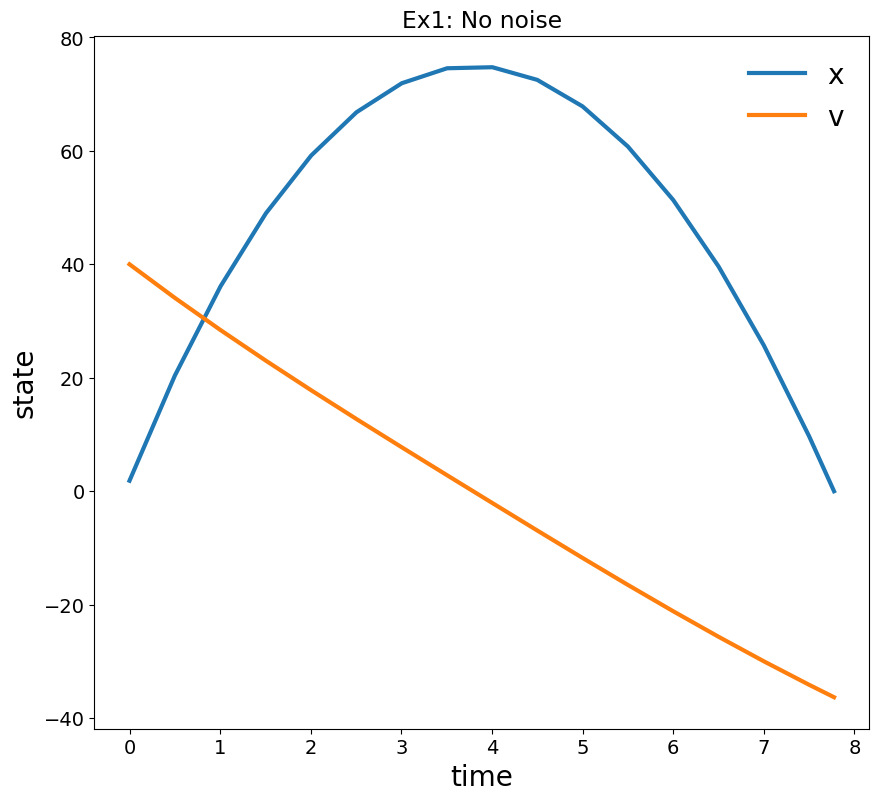

In [9]:

simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex1: No noise')